# Домашнее задание №4

Урок 4. Классификация текста. Анализ тональности текста.

В качестве заготовки для задания прогоним часть 2ого домашнего задания. Нам необходимо получить разреженные матрицы, используя CountVectorizer, TfidfVectorizer для 'tweet_stemmed' и 'tweet_lemmatized' столбцов (4 матрицы).

In [60]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import re
import pandas, xgboost, numpy, textblob, string
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import f1_score
import numpy as np

In [38]:
# Загрузим сохраненные данные из предыдущей домашней работы

combine_df = pd.read_pickle("df.pkl")
combine_df.head(3)

,id,label,tweet,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,1,0.0,@user when a father is dysfunctional and is s...,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...","[father, dysfunct, selfish, drag, kid, dysfunc...","[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit cannot use cause they d...,"[thanks, for, lyft, credit, can, not, use, cau...","[thanks, lyft, credit, use, cause, offer, whee...","[thank, lyft, credit, use, caus, offer, wheelc...","[thanks, lyft, credit, use, cause, offer, whee..."
2,3,0.0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]","[bihday, majesti]","[bihday, majesty]"


## Задание 1

Построим модель LogisticRegression, используя Bag-of-Words признаки для столбца combine_df['tweet_stemmed']. 
- Поделим Bag-of-Words признаки на train, test (train заканчивается на 31962 строке combine_df)
- Ответами является столбец train_df['label']
- Рассчитаем predict_proba, приведем prediction в в бинарный вид: если предсказание >= 0.3 то 1, иначе 0, тип заменим на int
- Рассчитаем f1_score 


In [125]:
treashold = 0.3

In [92]:
# Переводим tweet_lemmatized и tweet_stemmed из списков строк в строки, чтобы vectorizerы отработали
combine_df['tweet_stemmed_str'] = combine_df['tweet_stemmed'].apply(lambda x: ' '.join(x))
combine_df['tweet_lemmatized_str'] = combine_df['tweet_lemmatized'].apply(lambda x: ' '.join(x))

# Разбиваем на тренировочный и тестовый датафреймы
train = combine_df[:31962]
test = combine_df[31962:]

# Преобразуем целевую переменную к целочисленному типу
train['label'] = train['label'].astype('int64', copy=True)

In [126]:
# Разбиваем train на train и valid
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(train['tweet_stemmed_str'], 
                                                                      train['label'], 
                                                                      random_state=42)

# Проводим векторизацию с использованием CountVectorizer
count_vectorizer = CountVectorizer(max_df=0.9, 
                                   max_features = 5000, 
                                   stop_words='english', 
                                   analyzer='word', 
                                   token_pattern=r'\w{1,}')

xtrain_count =  count_vectorizer.fit_transform(train_x)
xvalid_count =  count_vectorizer.transform(valid_x)

# Обучаем модель и получаем предсказания
lr = linear_model.LogisticRegression(class_weight="balanced").fit(xtrain_count, train_y)
predicted = lr.predict_proba(xvalid_count)[:, 1]

# Переходим от вероятностей к меткам по порогу treashold
int_predicted = np.where(predicted >= treashold, 1, 0)

f1_count_stem = f1_score(valid_y, int_predicted)
print(f1_count_stem)

0.48244274809160304


Повторим аналогично для столбца combine_df['tweet_lemmatized'].


In [127]:
# Разбиваем train на train и valid
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(train['tweet_lemmatized_str'], 
                                                                      train['label'],
                                                                      random_state=42)

# Проводим векторизацию
count_vectorizer = CountVectorizer(max_df=0.9, 
                                   max_features = 5000, 
                                   stop_words='english', 
                                   analyzer='word', 
                                   token_pattern=r'\w{1,}')

xtrain_count =  count_vectorizer.fit_transform(train_x)
xvalid_count =  count_vectorizer.transform(valid_x)

# Обучаем модель и получаем предсказания
lr = linear_model.LogisticRegression(class_weight="balanced").fit(xtrain_count, train_y)
predicted = lr.predict_proba(xvalid_count)[:, 1]

# Переходим от вероятностей к меткам по порогу treashold
int_predicted = np.where(predicted >= treashold, 1, 0)

f1_count_lem = f1_score(valid_y, int_predicted)
print(f1_count_lem)

0.48830111902339773


## Задание 2

Построим модель LogisticRegression, используя TF-IDF признаки для столбца combine_df['tweet_stemmed']. 
- Поделим TF-IDF признаки на train, test (train заканчивается на 31962 строке combine_df)
- Ответами является столбец train_df['label']
- Рассчитаем predict_proba, приведем prediction в в бинарный вид: если предсказание >= 0.3 то 1, иначе 0, тип заменим на int
- Рассчитаем f1_score 


In [128]:
# Разбиваем train на train и valid
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(train['tweet_stemmed_str'], 
                                                                      train['label'],
                                                                      random_state=42)

# Проводим векторизацию с использованием CountVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, 
                                   max_features = 5000, 
                                   stop_words='english', 
                                   analyzer='word', 
                                   token_pattern=r'\w{1,}')

xtrain_tfidf =  tfidf_vectorizer.fit_transform(train_x)
xvalid_tfidf =  tfidf_vectorizer.transform(valid_x)

# Обучаем модель и получаем предсказания
lr = linear_model.LogisticRegression(class_weight="balanced").fit(xtrain_tfidf, train_y)
predicted = lr.predict_proba(xvalid_tfidf)[:, 1]

# Переходим от вероятностей к меткам по порогу treashold
int_predicted = np.where(predicted >= treashold, 1, 0)

f1_tfidf_stem = f1_score(valid_y, int_predicted)
print(f1_tfidf_stem)

0.4341761115954664


Повторим аналогично для столбца combine_df['tweet_lemmatized'].

In [129]:
# Разбиваем train на train и valid
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(train['tweet_lemmatized_str'], 
                                                                      train['label'],
                                                                      random_state=42)

# Проводим векторизацию с использованием CountVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, 
                                   max_features = 5000, 
                                   stop_words='english', 
                                   analyzer='word', 
                                   token_pattern=r'\w{1,}')

xtrain_tfidf =  tfidf_vectorizer.fit_transform(train_x)
xvalid_tfidf =  tfidf_vectorizer.transform(valid_x)

# Обучаем модель и получаем предсказания
lr = linear_model.LogisticRegression(class_weight="balanced").fit(xtrain_tfidf, train_y)
predicted = lr.predict_proba(xvalid_tfidf)[:, 1]

# Переходим от вероятностей к меткам по порогу treashold
int_predicted = np.where(predicted >= treashold, 1, 0)

f1_tfidf_lem = f1_score(valid_y, int_predicted)
print(f1_tfidf_lem)

0.43895989422653153


## Задание 3

Выведите результаты f1-score всех моделей, сделайте вывод

In [112]:
print(f'CountVectorizer + PorterStemmer:     {f1_count_stem}')
print(f'CountVectorizer + WordNetLemmatizer: {f1_count_lem}')
print(f'TfidfVectorizer + PorterStemmer:     {f1_tfidf_stem}')
print(f'TfidfVectorizer + WordNetLemmatizer: { f1_tfidf_lem}')

CountVectorizer + PorterStemmer:     0.48244274809160304
CountVectorizer + WordNetLemmatizer: 0.48830111902339773
TfidfVectorizer + PorterStemmer:     0.4341761115954664
TfidfVectorizer + WordNetLemmatizer: 0.43895989422653153


В данном примере применение WordNetLemmatizer CountVectorizer даем наилучший результат. При других значениях treashold может получиться другой порядок лидеров :-)

## Задание 4

Теперь перейдем к визуализации. Посмотрим, какие слова являются наиболее популярные в датасете с помощью облака слов (WordCloud).
Облако слов - это визуализация, в которой наиболее частые слова большого размера, а менее частые слова меньшего размера.
- объединим слова в одну строку
- создадим словарь частот слов с помощью collections.Counter
- нарисуем облако слов с частотами слов с помощью WordCloud.generate_from_frequencies()
- используем nltk.corpus.stopwords как параметр stopwords, чтобы убрать "мусорные" частотные слова


In [141]:
import collections

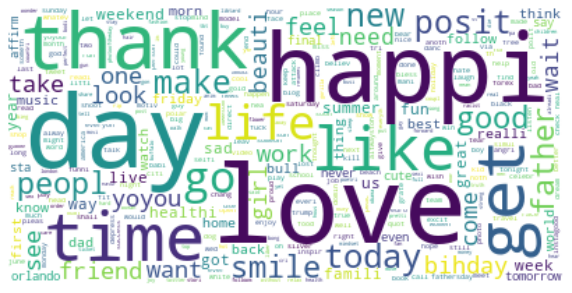

In [142]:
text = ' '.join(train['tweet_stemmed_str'].values)
text = text.split()

wordfreq = collections.Counter(text)
wordcloud = WordCloud(
 background_color='white',
 max_words=2000,
 stopwords=stopwords
 ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Задание 5

Теперь отобразим облако слов для отзывов, не содержащих токсичных комментариев (combine_df['label'] == 0). 

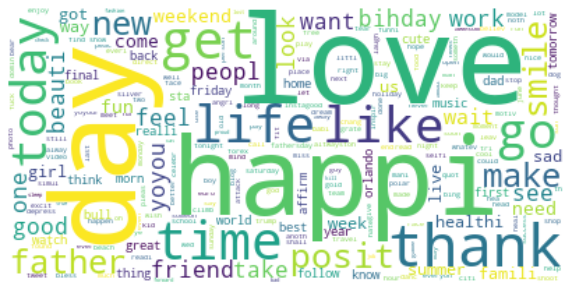

In [148]:
text = ' '.join(train[train['label']==0]['tweet_stemmed_str'].values)
text = text.split()

wordfreq = collections.Counter(text)
wordcloud = WordCloud(
 background_color='white',
 max_words=2000,
 stopwords=stopwords
 ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Задание 6

Теперь отобразим облако слов для отзывов, содержащих токсичные комментарии (combine_df['label'] == 1). 

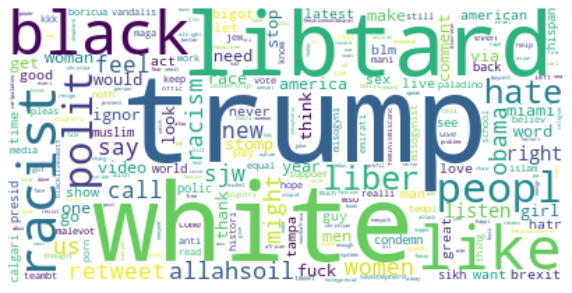

In [149]:
text = ' '.join(train[train['label']==1]['tweet_stemmed_str'].values)
text = text.split()

wordfreq = collections.Counter(text)
wordcloud = WordCloud(
 background_color='white',
 max_words=2000,
 stopwords=stopwords
 ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()